<a href="https://colab.research.google.com/github/NonaHelmi/SC/blob/main/MLP_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVHN (Street View House Numbers)
تعداد تصاویر: حدود 600,000 تصویر در حالتی که شامل 10,000 تصویر در مجموعه‌ تست باشد.

ابعاد تصاویر: 32x32 پیکسل، رنگی

توضیحات: این دیتاست شامل تصاویر شماره‌های خیابانی است که از Google Street View بدست آمده‌اند و معمولاً برای یادگیری شناسایی کاراکترها استفاده می‌شود.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# load SVHN dataset
svhn_data, svhn_info = tfds.load('svhn_cropped', split=['train', 'test'], with_info=True, as_supervised=True)

# test & train data
train_data, test_data = svhn_data

def normalize_and_convert_to_numpy(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())

    return (np.array(images), np.array(labels))

#
(x_train, y_train) = normalize_and_convert_to_numpy(train_data)
(x_test, y_test) = normalize_and_convert_to_numpy(test_data)

# print size of data
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.XRI423_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.XRI423_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.XRI423_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.
x_train shape: (73257, 32, 32, 3), y_train shape: (73257,)
x_test shape: (26032, 32, 32, 3), y_test shape: (26032,)


Feature matrix: (73257, 32, 32, 3)
Target matrix: (26032, 32, 32, 3)
Feature matrix: (73257,)
Target matrix: (26032,)


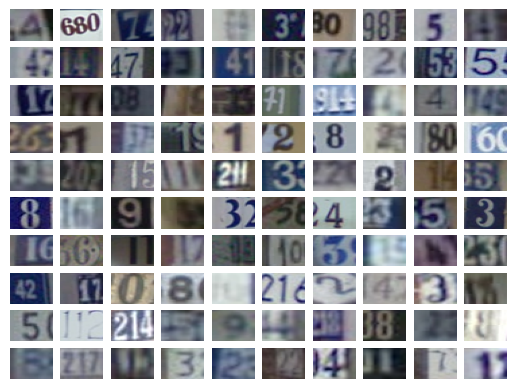

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale
# To understand the structer of dataset
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].axis("off")
        # ax[i][j].set_visible(False)
        # ax[i][j].clear()
        # ax[i][j].remove()
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
plt.show()


In [ ]:
model = Sequential()
# reshape 32 row * 32 column data to 32*32 rows
model.add(Flatten(input_shape=(32, 32, 3)))
# dense layer 1
model.add(Dense(256, activation='sigmoid'))
# dense layer 2
model.add(Dense(128, activation='sigmoid'))
# output layer
model.add(Dense(10, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split=0.2)


Epoch 1/10
30/30 [==============================] - 8s 228ms/step - loss: 2.2641 - accuracy: 0.1844 - val_loss: 2.2392 - val_accuracy: 0.1907
Epoch 2/10
30/30 [==============================] - 5s 180ms/step - loss: 2.2383 - accuracy: 0.1888 - val_loss: 2.2345 - val_accuracy: 0.1907
Epoch 3/10
30/30 [==============================] - 5s 176ms/step - loss: 2.2345 - accuracy: 0.1888 - val_loss: 2.2299 - val_accuracy: 0.1907
Epoch 4/10
30/30 [==============================] - 5s 176ms/step - loss: 2.2268 - accuracy: 0.1895 - val_loss: 2.2142 - val_accuracy: 0.1929
Epoch 5/10
30/30 [==============================] - 5s 179ms/step - loss: 2.2063 - accuracy: 0.1923 - val_loss: 2.1906 - val_accuracy: 0.1820
Epoch 6/10
30/30 [==============================] - 5s 176ms/step - loss: 2.1734 - accuracy: 0.2122 - val_loss: 2.1483 - val_accuracy: 0.2312
Epoch 7/10
30/30 [==============================] - 5s 173ms/step - loss: 2.1246 - accuracy: 0.2367 - val_loss: 2.0906 - val_accuracy: 0.2574
Epoch 

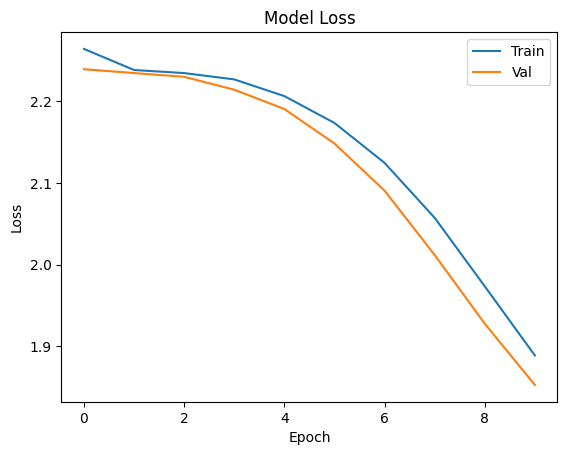

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()